# Análisis de constantes de filtrado


En esta notebook, haremos un análisis de las constantes para filtrar palabras y usuarios. En el trabajo original utilizamos 40 ocurrencias y 5 usuarios para filtrar, pero puede que no sea el mejor para este nuevo dataset.





In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("../output/listado_personas.csv", index_col=0)

print("Total de palabras: {}".format(df.shape[0]))

Total de palabras: 85701


Agrego la serie de puntos de la suma acumulada de frecuencias

In [2]:
occ_columns = [c for c in df.columns if "_ocurrencias" in c]
user_columns = [c for c in df.columns if "_usuarios" in c and c != "cant_usuarios"]

def graph_no_provinces(df, columns):
    X = -np.sort(-df[columns].values)

    cumsum = (X / X.sum(axis=1).reshape(-1, 1)).cumsum(axis=1)

    cs = pd.DataFrame(cumsum, columns=range(1, 24))
    cs["palabra"] = df.index
    cs.set_index("palabra", inplace=True)
    extended_df = pd.concat([df, cs], axis=1)
    
    values = {}
    for limit in [1000, 2000, 3000, 5000, 10000, 20000]:
        values[limit] = extended_df[:limit][list(range(1,24))].mean()
    
    values["todas"] = extended_df[list(range(1,24))].mean()
    pd.DataFrame(values).plot(marker='o')

Ahora, veamos lo siguiente: para las primeras 1000, 2000, 3000, y 5000 palabras ¿cuál es la media de la frecuencia relativa acumulada usando las $i$ provincias con mayor masa?

Text(0,0.5,'Masa acumulada')

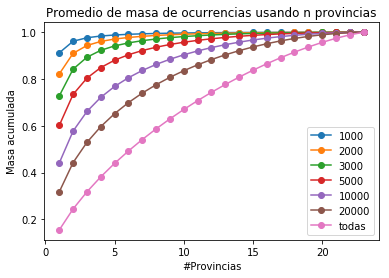

In [3]:
graph_no_provinces(df, occ_columns)
plt.title("Promedio de masa de ocurrencias usando n provincias")
plt.xlabel("#Provincias")
plt.ylabel("Masa acumulada")

Hagamos lo mismo, pero viendo qué masa de usuarios reúnen


Text(0,0.5,'Masa acumulada')

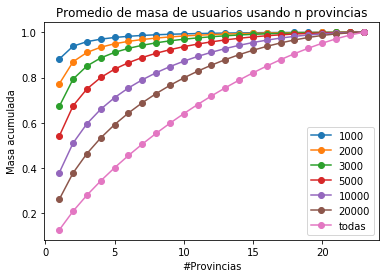

In [4]:
graph_no_provinces(df, user_columns)
plt.title("Promedio de masa de usuarios usando n provincias")
plt.xlabel("#Provincias")
plt.ylabel("Masa acumulada")

Como región, elijamos las palabras que reúnen el 80% del uso de cada palabra.

In [5]:
# %load contrastes/geo.py
"""Geographical functions for words."""
def region(word_series, threshold=0.95):
    ws = word_series / word_series.sum()
    accum = 0
    provs = []

    for prov in ws.sort_values(ascending=False).index:
        accum+= ws[prov]
        provs.append(prov)
        if accum >= threshold:
            break

    return [p.split("_")[0] for p in provs]


In [6]:
region(df.loc["ipauss"][occ_columns])

['tierradelfuego']

In [7]:
region(df.loc["clda"][user_columns])

['mendoza', 'sanluis', 'neuquen', 'tierradelfuego', 'lapampa']

In [8]:
region(df.loc["clda"][occ_columns])

['mendoza', 'sanluis', 'neuquen']

Calculemos regiones usando ocurrencias de palabras y de usuarios!

In [9]:
df["region"] = df[user_columns].apply(region, axis=1)

In [ ]:
df[:10]